In [1]:
#e
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
#e
def p():
    plt.plot(range(10), [x**2 for x in range(10)])

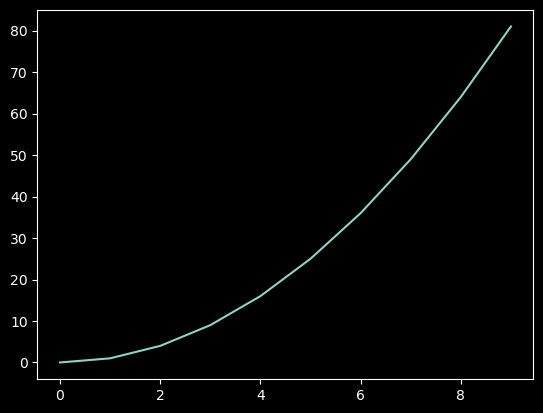

In [3]:
p()

In [4]:
import z_export

z_export.export()

Processing plot.ipynb -> /home/nblzv/git/fastai_course22p2/minai/minai/plot.py
  same contents, skipping
Creating setup.py -> /home/nblzv/git/fastai_course22p2/minai/setup.py
  lib_name: minai
  author: nblzv
  version: 0.1.0

All good!
